In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
## Load the dataset using pandas(csv or excel format)
import numpy as np
import pandas as pd
df=pd.read_csv('netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [17]:
## Inspect data for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [18]:
## Inspect data for duplicates
print("\nDuplicate Records:", df.duplicated().sum())


Duplicate Records: 0


In [19]:
## Inspect data for incorrect data types
print("\nData Types:\n", df.dtypes)


Data Types:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [20]:
## Handling missing values(drop/fill/replace)
# Fill missing categorical columns with mode
cat_cols = ['director', 'cast', 'country', 'date_added', 'rating', 'duration']
for col in cat_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)
    print(f"Filled missing values in '{col}' with mode: {mode_val}")

Filled missing values in 'director' with mode: Rajiv Chilaka
Filled missing values in 'cast' with mode: David Attenborough
Filled missing values in 'country' with mode: United States
Filled missing values in 'date_added' with mode: January 1, 2020
Filled missing values in 'rating' with mode: TV-MA
Filled missing values in 'duration' with mode: 1 Season


In [21]:
## Remove or Correct Duplicate Records
df.drop_duplicates(inplace=True)
print("Duplicates removed.")

Duplicates removed.


In [22]:
# Convert 'date_added' column to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
print("Converted 'date_added' to datetime.")

Converted 'date_added' to datetime.


In [23]:
# Add a new column using NumPy: title length
df['title_length'] = df['title'].apply(lambda x: np.char.str_len(str(x)))
print("Added 'title_length' column using NumPy.")
# Example: Count words in 'description' using NumPy (via apply)
df['description_word_count'] = df['description'].apply(lambda x: len(str(x).split()))
print("Added new column 'description_word_count' with word counts from the 'description' column.")

Added 'title_length' column using NumPy.
Added new column 'description_word_count' with word counts from the 'description' column.


In [24]:
# Filter: Only Movies
only_movies = df[df['type'] == 'Movie']
print(f"Filtered dataset to include only Movies. Total rows: {len(only_movies)}")

# Sort: by release_year descending
df_sorted = df.sort_values(by='release_year', ascending=False)
print("Sorted the dataset by 'release_year' in descending order.")

# Group: Number of shows per country (Top 10)
country_counts = df['country'].value_counts().head(10)
print("Top 10 countries with the highest number of shows:\n")
print(country_counts)

Filtered dataset to include only Movies. Total rows: 6131
Sorted the dataset by 'release_year' in descending order.
Top 10 countries with the highest number of shows:

country
United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64



Summary statistics:
       show_id   type   title       director                cast  \
count     8807   8807    8807           8807                8807   
unique    8807      2    8807           4528                7692   
top      s8807  Movie  Zubaan  Rajiv Chilaka  David Attenborough   
freq         1   6131       1           2653                 844   
mean       NaN    NaN     NaN            NaN                 NaN   
min        NaN    NaN     NaN            NaN                 NaN   
25%        NaN    NaN     NaN            NaN                 NaN   
50%        NaN    NaN     NaN            NaN                 NaN   
75%        NaN    NaN     NaN            NaN                 NaN   
max        NaN    NaN     NaN            NaN                 NaN   
std        NaN    NaN     NaN            NaN                 NaN   

              country                     date_added  release_year rating  \
count            8807                           8719   8807.000000   8807   
unique  

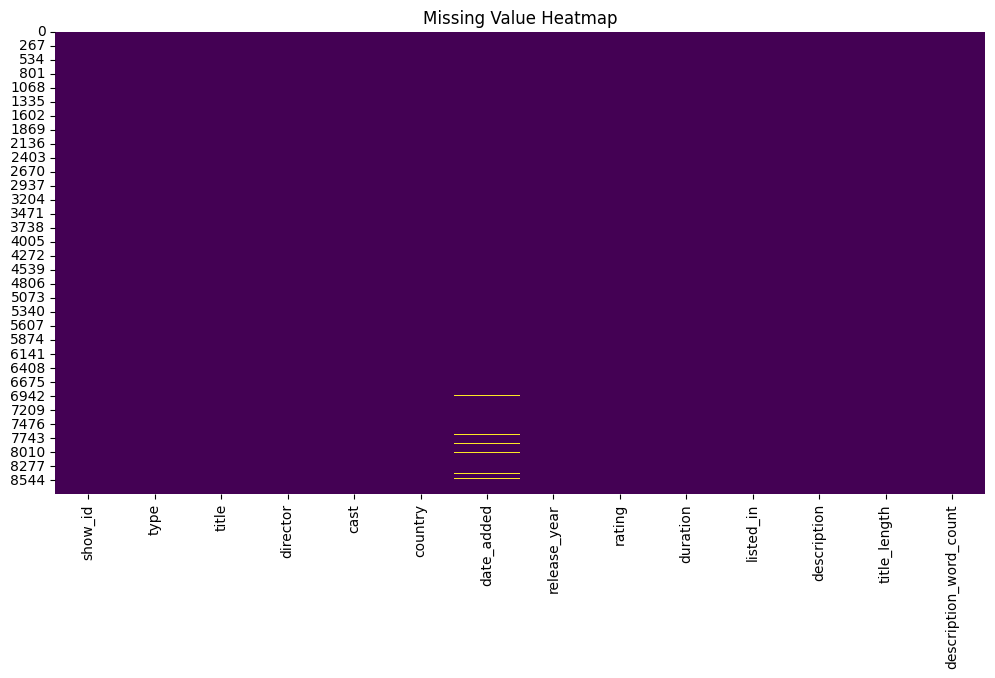

In [25]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))

# Optional: Visualize using Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing values
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Value Heatmap")
plt.show()

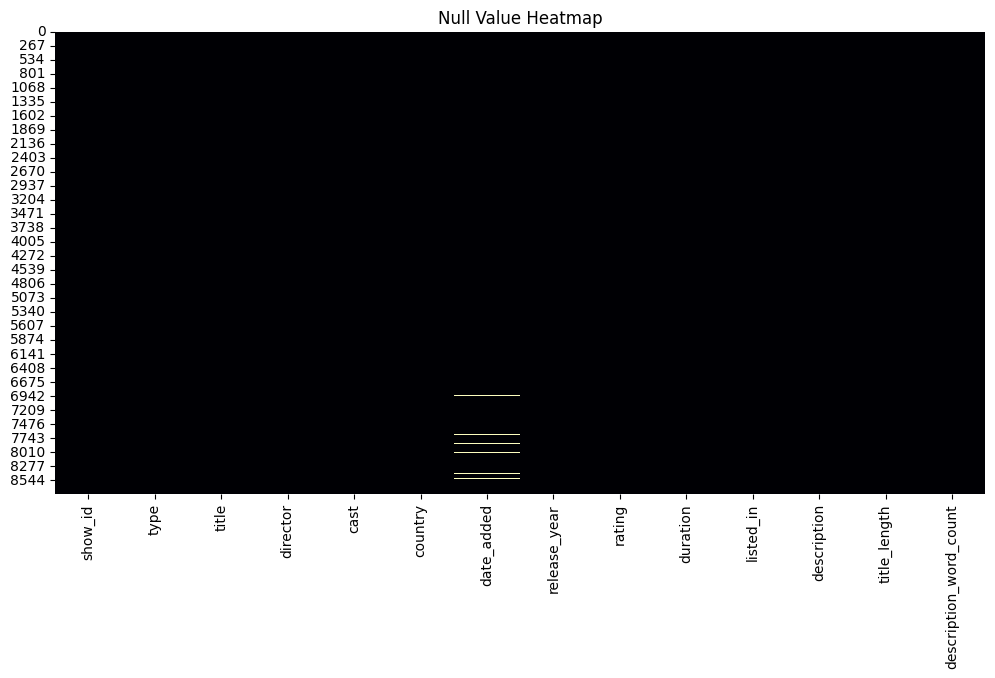

In [26]:
# 1. Visualize null values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='magma')
plt.title("Null Value Heatmap")
plt.show()

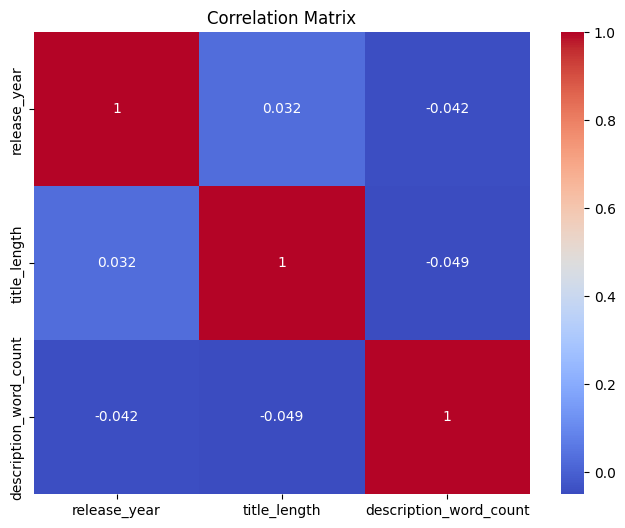

In [27]:
# 2. Correlation matrix (for numeric fields)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [28]:
# 3. Apply Label Encoding for ML readiness

label_encoders = {}
for col in ['type', 'rating']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\nCleaned & Encoded Data Sample:\n", df.head())


Cleaned & Encoded Data Sample:
   show_id  type                  title         director  \
0      s1     0   Dick Johnson Is Dead  Kirsten Johnson   
1      s2     1          Blood & Water    Rajiv Chilaka   
2      s3     1              Ganglands  Julien Leclercq   
3      s4     1  Jailbirds New Orleans    Rajiv Chilaka   
4      s5     1           Kota Factory    Rajiv Chilaka   

                                                cast        country  \
0                                 David Attenborough  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                 David Attenborough  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year  rating   duration  \
0 2021-09-25          2020       7     90 min   
1 2021-09-24          2021      11  2 Seasons   
2 2021-09-24          2021      11   1

# New Section